In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import sys
#sys.path.append('/data/tjarniko/MEOPAR/mocsy')
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
# import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seawater as sw
import matplotlib.pyplot as plt
# from matplotlib import reload
plt.style.use('seaborn-bright')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

## Rivers we have data for and their watersheds

In [3]:

watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    #print('~~')
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        #print('Riv: '+riv+', watershed: '+watshed)
        #swap is, js here
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1


gauge_riv = ['Squamish','SanJuan','Elwha','DungenessMatriotti','Hoko','LittleBigQuilcene',\
            'Duckabush','Skokomish','DeerJohnsGoldboroughMill','Deschutes','Chambers',\
            'Chambers','NisquallyMcAllister','Puyallup','CedarSammamish','Skagit1',\
            'Samish','Stillaguamish1','SnohomishAllenQuilceda','Tulalip','Mission',\
            'Nooksack','Fraser','Oyster','Qunisam','SalmonSayward','Theodosia',
             'Homathko','Cowichan1','Chemanius1','Nanaimo1','Englishman',
             'LittleQualicum','Puntledge']

cols = ['darkgray','red','powderblue','tan','orange',\
    'navy','palegreen','mediumaquamarine','dodgerblue','violet']
watersheds = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']

In [4]:
def wshed_plot(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit, names = True):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
#     ax.set_xlabel('x Index', fontsize = 20 )
#     ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    wsl_HR = ['Howe', 'JdF', 'Puget', 'Skagit', 'Fraser', 'N.V.I.', 'Jervis', 'Toba', 'Bute', 'S.V.I.']
    
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:
            #print(riv)
            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=100,c=cols[wc],label = wsl_HR[wc],marker='o')
                
            else:
                pts = ax.scatter(tj,ti,s=100,c=cols[wc],marker='o')
            
            if names:
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)

            rc = rc+1
            tr = tr+1
#             print(rc)
#             print(tr)
        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks([])
    plt.yticks([])
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.legend(loc = 'best')
    plt.suptitle(bigtit,fontsize=20)

In [5]:
# print(bath1)

In [6]:
watersheds = rv.prop_dict.keys()

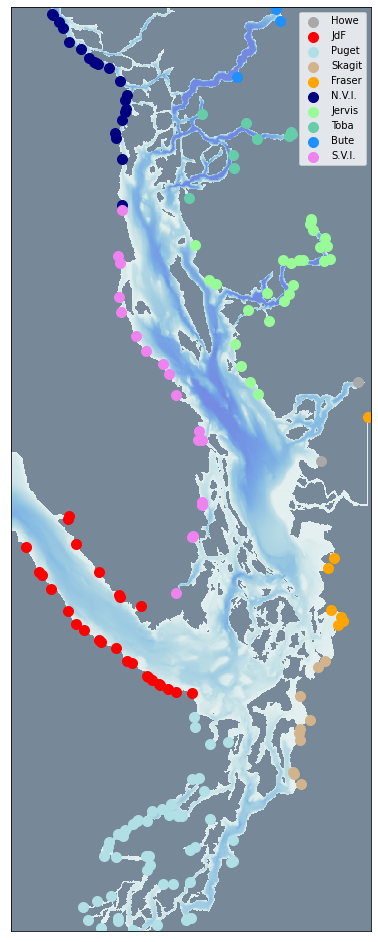

In [7]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']
wshed_plot(bath1,'', \
               cm.cm.dense,8,17,0,1000,'bathymetry','', names = False)

In [8]:
def wshed_wtext_gauge(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:
            #print(riv)
            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],label = wsl[wc],marker='o')

            else:
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
            if riv in gauge_riv:
                pts = ax.scatter(tj,ti,s=200,c=cols[wc],marker='*')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 15)

            rc = rc+1
            tr = tr+1

        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

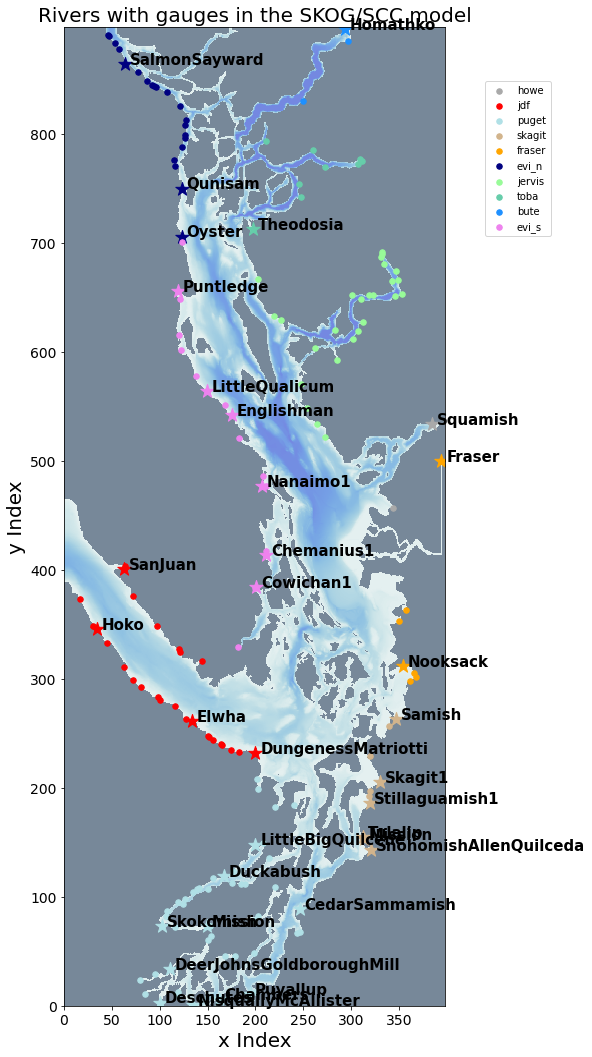

In [9]:
wshed_wtext_gauge(bath1,'Rivers with gauges in the SKOG/SCC model', \
               cm.cm.dense,12,18,0,1000,'bathymetry','')

In [10]:
daylist = [31,29,31,30,31,30,31,31,30,31,30,31]
# mons=[]
mons=np.zeros([1,12])
for i in range(1,12):
    mons[0,i]=sum(daylist[0:i])
    
print(mons)
mons = mons[0]
print(mons)

[[  0.  31.  60.  91. 121. 152. 182. 213. 244. 274. 305. 335.]]
[  0.  31.  60.  91. 121. 152. 182. 213. 244. 274. 305. 335.]


In [11]:
tnc = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_20151127_20151231_grid_T_20151217-20151217.nc')
# print(tnc)
# print(tnc.variables['area'])
# print(tnc.variables['area'][250,250])

In [12]:
daylist = [31,28,31,30,31,30,31,31,30,31,30,31]
# mons=[]
mons=np.zeros([1,12])
for i in range(1,12):
    mons[0,i]=sum(daylist[0:i])
    
print(mons)
mons = mons[0]
print(mons)

watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    #print('~~')
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        #print('Riv: '+riv+', watershed: '+watshed)
        #swap is, js here
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1
        
#tnc = nc.Dataset('/data/tjarniko/results/SAMPL/SalishSea_1ts_20141121_20141121_grid_T_20141121-20141121.nc')
runoff_table = np.zeros([171,12])
runoff_table_m3 = np.zeros([171,12])
runoff_table_m3_daily = np.zeros([171,365])
rivdat = nc.Dataset('/data/tjarniko/MEOPAR/rivers/rivers_month_201702.nc')
t_runoff = rivdat.variables['rorunoff']
riv_runoff_mod = {}
riv_id = {}
riv_jd = {}
riv_runoff_m3 = {}

#print(t_runoff.shape)
w = 90
#print(t_runoff[:,riv_j[w],riv_i[w]])

print(t_runoff)
for r in range(0,len(riv_i)):
    
    print(riv_name[r])
    ti = riv_i[r]
    #print(ti)
    tj = riv_j[r]
    runoff = t_runoff[:,tj,ti]
    year_runoff = np.zeros([1,365])
    year_runoff = np.squeeze(year_runoff)
    runoff_table[r,:]= runoff
    riv_id[riv_name[r]] = ti
    riv_jd[riv_name[r]] = tj
    for i in range (0,11):
        st = (mons[i])
        en = (mons[i+1])
        year_runoff[int(st):int(en)] = runoff[i]
    year_runoff[int(mons[11]):366] = runoff[11]
    riv_runoff_mod[riv_name[r]] = year_runoff
#     print(runoff)
    t_area = (tnc.variables['area'][tj,ti])
    
#     print(year_runoff)
    year_runoff2 = (year_runoff / 1000) * t_area
#     print(year_runoff) 
    riv_runoff_m3[riv_name[r]] = year_runoff2
    runoff_table_m3[r,:] = runoff / 1000 * t_area
    runoff_table_m3_daily[r,:] = year_runoff2
    
    
    #runoff_table = np.zeros([171,12])
    
#     riv_runoff_mod[riv_name[r]] = t_runoff[:,tj,ti]


        
        
#  Hi Tereza,
#  I'm not the least surprised that you are confused.  Rivers are treated like rain, added from above.  So kg of water/m2 /s where the m2 is horizontal area.  This we will call nf (nemo flux)

# So for m3/s first we convert from mass to volume

# nf / rho (fresh water so 1000 kg/m3)  so now we have m/s

# Then multiply by the area of the grid cell

# nf  / rho * e1t(i,j) *e2t(i,j)

# Cheers,
# Susan   

[[  0.  31.  59.  90. 120. 151. 181. 212. 243. 273. 304. 334.]]
[  0.  31.  59.  90. 120. 151. 181. 212. 243. 273. 304. 334.]
<class 'netCDF4._netCDF4.Variable'>
float32 rorunoff(time_counter, y, x)
    units: kg m-2 s-1
    long_name: runoff_flux
unlimited dimensions: time_counter
current shape = (12, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

Squamish
Burrard
SanJuan
Gordon
Loss
Jordan
Muir
Tugwell
Sooke
Elwha
Tumwater
Valley
Ennis
Morse
Bagley
Siebert
McDonald
DungenessMatriotti
Coville
Salt
Field
Lyre
EastWestTwin
Deep
Pysht
Clallom
Hoko
Sekiu
Sail
Johnson
Jimmycomelately
SalmonSnow
Chimacum
Thorndike
Torboo
LittleBigQuilcene
Dosewalips
Duckabush
Fulton
Waketick
HammaHamma
Jorsted
Eagle
Lilliwaup
Finch
Skokomish
Rendsland
Tahuya
Mission
Union
Coulter
Minter
Burley
Olalla
Blackjack
ClearBarker
BigValley
BigBear
Swaback
Stavis
Anderson
Dewatta
Sherwood
DeerJohnsGoldboroughMill
Skookum
KennedySchneider
PerryMcClane
Deschutes
Woodward
Woodland
Chambers
Nisq

In [13]:
wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
cols = ['darkgray','red','ghostwhite','tan','orange',\
    'navy','palegreen','mediumaquamarine','dodgerblue','violet']
ws_col = {'howe': {'color':'darkgray'},\
         'jdf': {'color':'red'},\
         'puget': {'color':'powderblue'},\
         'skagit': {'color':'tan'},\
         'fraser': {'color':'orange'},\
         'evi_n': {'color':'navy'},\
         'jervis': {'color':'palegreen'},\
         'toba': {'color':'mediumaquamarine'},\
         'bute': {'color':'dodgerblue'},\
         'evi_s': {'color':'violet'}}

ws_col['howe']

{'color': 'darkgray'}

In [14]:
#print(riv_name)
#print(riv_name == 'Fraser')

#riv_name.index('Fraser')
wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
riv_shed.index('howe')
#print(riv_shed)

shed_clim = np.zeros([10,12])

for w in range(0,len(wsl)):
    t_shed = wsl[w]
    indices = [i for i, x in enumerate(riv_shed) if x == t_shed]
    print(t_shed)
    print(indices)
    start_ind = indices[0]
    end_ind = indices[len(indices)-1]
    t_runoff = np.sum(runoff_table[start_ind:end_ind+1,:],0)
    shed_clim[w,:]=t_runoff
    #print(end_ind)


print(runoff_table[0,:])

print(runoff_table[1,:])
print('~')
print(shed_clim[0,:])

howe
[0, 1]
jdf
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
puget
[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
skagit
[77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
fraser
[87, 88, 89, 90, 91, 92, 93]
evi_n
[94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
jervis
[115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
toba
[141, 142, 143, 144, 145, 146, 147, 148, 149]
bute
[150, 151, 152]
evi_s
[153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
[0.61816508 0.70729113 0.66638255 0.98459643 1.85939431 2.23619246
 2.04238057 1.51061082 1.06683719 1.09384131 1.05779386 0.81105733]
[0.04499843 0.05148624 0.04850835 0.07167228 0.13535

No handles with labels found to put in legend.


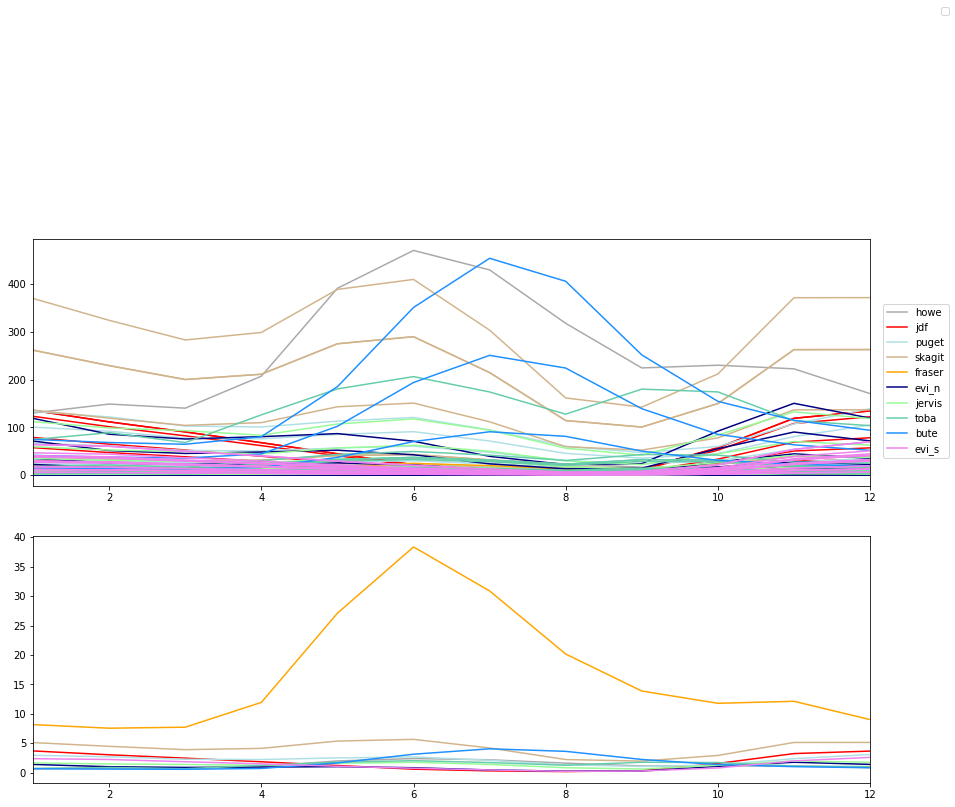

In [15]:
monr = np.arange(1,13,1)
fig = plt.figure(figsize=(15,10))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    #plt.xlim([0,93])

    if i == 1:
        for j in range(0,len(riv_i)):
            t_watershed = riv_shed[j]
            
            #print(j)
            if j != 93:
                
                ax.plot(monr,runoff_table_m3[j,:],color = ws_col[t_watershed]['color'])
            
    ax.set_xlim([1,12])
    
    if i == 2:
        for j in range(0,len(shed_clim)):    
            t_watershed = wsl[j]
            #print(j)
            #if j != 93:
#             if j != 4:   
            ax.plot(monr,shed_clim[j,:],color = ws_col[t_watershed]['color'],label=t_watershed)
            
    ax.set_xlim([1,12])    
    plt.legend(bbox_to_anchor=(1.1, 1.96))
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [16]:
riv_runoff_m3

{'Squamish': masked_array(data=[130.16975346, 130.16975346, 130.16975346, 130.16975346,
                    130.16975346, 130.16975346, 130.16975346, 130.16975346,
                    130.16975346, 130.16975346, 130.16975346, 130.16975346,
                    130.16975346, 130.16975346, 130.16975346, 130.16975346,
                    130.16975346, 130.16975346, 130.16975346, 130.16975346,
                    130.16975346, 130.16975346, 130.16975346, 130.16975346,
                    130.16975346, 130.16975346, 130.16975346, 130.16975346,
                    130.16975346, 130.16975346, 130.16975346, 148.93742001,
                    148.93742001, 148.93742001, 148.93742001, 148.93742001,
                    148.93742001, 148.93742001, 148.93742001, 148.93742001,
                    148.93742001, 148.93742001, 148.93742001, 148.93742001,
                    148.93742001, 148.93742001, 148.93742001, 148.93742001,
                    148.93742001, 148.93742001, 148.93742001, 148.93742001,


(365,)
3548.8770919476597


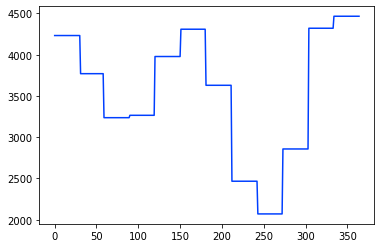

In [17]:
#print(runoff_table_m3_daily[93,:])

runoff_table_m3_daily_noFraser = np.copy(runoff_table_m3_daily)
runoff_table_m3_daily_noFraser[93,:] = np.nan

daily_nonfraser_rivers = np.nansum(runoff_table_m3_daily_noFraser,axis = 0)
print(np.shape(daily_nonfraser_rivers))

plt.plot(daily_nonfraser_rivers)
print(np.nanmean(daily_nonfraser_rivers))

In [18]:
##runoff table without fraser